# Исследование рынка видеоигр

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

---


**Описание данных**

- **Name** — название игры  
- **Platform** — платформа  
- **Year_of_Release** — год выпуска  
- **Genre** — жанр игры  
- **NA_sales** — продажи в Северной Америке (в миллионах проданных копий)  
- **EU_sales** — продажи в Европе (в миллионах проданных копий)  
- **JP_sales** — продажи в Японии (в миллионах проданных копий)  
- **Other_sales** — продажи в других странах (в миллионах проданных копий)  
- **Critic_Score** — оценка критиков (максимум 100)  
- **User_Score** — оценка пользователей (максимум 10)  
- **Rating** — рейтинг от ESRB (Entertainment Software Rating Board), определяющий возрастную категорию

> *Примечание: Данные за 2016 год могут быть неполными.*

---

**Цель исследования**

Выявить закономерности, определяющие успешность игры. Результаты исследования помогут:
- Определить факторы, влияющие на популярность продукта.
- Сформировать портрет потенциально успешного продукта.
- Спланировать рекламные кампании для продвижения игр.


---

**Ход исследования**

1. **Загрузка и предобработка данных:**  
   - Импорт и первичный анализ датасета.
   - Очистка данных и обработка пропусков.
   - Приведение данных к необходимым типам.


2. **Исследовательский анализ данных (EDA):**  
   - Анализ распределения продаж в Северной Америке, Европе, Японии и других регионах.
   - Исследование взаимосвязей между оценками критиков и пользователей.
   - Выявление закономерностей по жанрам, платформам и годам выпуска.


3. **Портрет пользователя по регионам:**  
   - Составление профиля типичного игрока для Северной Америки, Европы и Японии.
   - Сравнение популярных жанров и уровней продаж в каждом регионе.


4. **Проверка гипотез:**  
   - **Гипотеза 1:** Одинаковые ли средние пользовательские рейтинги для платформ Xbox One и PC.  
   - **Гипотеза 2:** Разные ли средние пользовательские рейтинги для жанров Action и Sports.  
   Для проверки гипотез будут применены статистические тесты.


5. **Вывод:**  
   - Формирование рекомендаций по стратегии разработки и маркетинга, основанных на выявленных закономерностях.




### Откроем файл с данными и изучим общую информацию

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
import numpy as np

In [2]:
# читаем CSV-файл с данными
df = pd.read_csv('/datasets/games.csv')

In [3]:
# выводим строки
df.head(20)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [4]:
# смотрим информацию
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
# выводим на экран количество строк-дубликатов
df.duplicated().sum()

0

In [6]:
# проверяем на неявные дубликаты
df.duplicated(subset=['Name','Platform', 'Critic_Score', 'Rating']).sum()

5

In [7]:
# Удаляем неявные дубликаты
df = df.drop_duplicates(subset=['Name', 'Platform', 'Critic_Score', 'Rating'])

# проверяем ещё раз
df.duplicated(subset=['Name','Platform', 'Critic_Score', 'Rating']).sum()

0

**Вывод:**

- **Названия столбцов** нужно привести к нижнему регистру.
- **Типы данных:**  
  - *year_of_release* — преобразовать в **int**.  
  - *critic_score* — преобразовать в **int** (так как оценивается от 0 до 100).  
  - *user_score* — преобразовать во **float**.
- **Пропуски:**  
  Обнаружены в столбцах *Name, Year_of_Release, Genre, Critic_Score, User_Score, Rating*.  
  Устранение пропусков будет важнейшей частью предобработки данных.
- **Дубликаты:**  
  Была проведена проверка на наличие дубликатов: явных дубликатов строк не обнаружено.  
  Найдено 5 неявных дубликатов, которые были удалены.


### Подготовка данных

#### Замена названий столбцов

In [8]:
# Приводим названия столбцов к нижнему регистру
df.columns = df.columns.str.lower()

# Проверяем 
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

#### Пропущенные значения

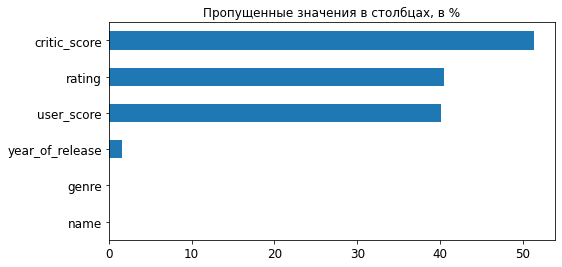

In [9]:
try:
    (
        (df.isna().mean()*100)
        .to_frame()
        .rename(columns = {0:'space'})
        .query('space > 0')
        .sort_values(by = 'space', ascending = True)
        .plot(kind = 'barh', figsize = (8, 4), rot = 0, legend = False, fontsize = 12)
        .set_title('Пропущенные значения в столбцах, в %')    
    );    
except:
    print('пропусков не осталось :) или произошла ошибка в первой части функции ')
        

In [10]:
# выводим количество пропущенных значений для каждого столбца
df.isna().sum()

name                  1
platform              0
year_of_release     268
genre                 1
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8577
user_score         6700
rating             6765
dtype: int64

Столбцы **name, year_of_release, и genre** содержат мало пропущенных значений, эти строки можно просто удалить.

In [11]:
# Удаляем строки
df = df.dropna(subset=['name', 'year_of_release', 'genre']).reset_index(drop=True)

**Большое количество пропущенных значений** обнаружено в столбцах **rating**, **critic_score** и **user_score**.  
Причина появления пропусков, возможно, связана с тем, что оценка не проводилась или данные были потеряны.

- Пропуски в колонке **rating** заменим на **undefined**.
- Остальные пропуски оставим без изменений, так как их замена может сильно исказить результаты.

Рассмотрим подробнее эти столбцы.


In [12]:
# смотрим уникальные значения для user_score
df['user_score'].sort_values().unique()

array(['0', '0.2', '0.3', '0.5', '0.6', '0.7', '0.9', '1', '1.1', '1.2',
       '1.3', '1.4', '1.5', '1.6', '1.7', '1.8', '1.9', '2', '2.1', '2.2',
       '2.3', '2.4', '2.5', '2.6', '2.7', '2.8', '2.9', '3', '3.1', '3.2',
       '3.3', '3.4', '3.5', '3.6', '3.7', '3.8', '3.9', '4', '4.1', '4.2',
       '4.3', '4.4', '4.5', '4.6', '4.7', '4.8', '4.9', '5', '5.1', '5.2',
       '5.3', '5.4', '5.5', '5.6', '5.7', '5.8', '5.9', '6', '6.1', '6.2',
       '6.3', '6.4', '6.5', '6.6', '6.7', '6.8', '6.9', '7', '7.1', '7.2',
       '7.3', '7.4', '7.5', '7.6', '7.7', '7.8', '7.9', '8', '8.1', '8.2',
       '8.3', '8.4', '8.5', '8.6', '8.7', '8.8', '8.9', '9', '9.1', '9.2',
       '9.3', '9.4', '9.5', '9.6', '9.7', 'tbd', nan], dtype=object)

- **'0'** — возможная оценка.
- **nan** — пропущенное значение.
- **'tbd'** — TBD (от англ. *To Be Determined* или *To Be Decided*). Используется, если какая-то информация ещё не определена или решение по вопросу не принято. Этот акроним служит для отметки пропусков, которые необходимо заполнить в информации требований.



Заменим все значения **'tbd'** на **nan**.


In [13]:
# заменяем tbd на nan
df['user_score'] = df['user_score'].replace('tbd', np.nan)

# проверяем, сколько осталось
(df['user_score'] == 'tbd').sum()

0

In [14]:
# Заменяем пропуски в колонке rating
df['rating'] = df['rating'].fillna('undefined')

In [15]:
df.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating                0
dtype: int64

#### Преобразование данных в нужные типы

In [16]:
# смотрим уникальные значения для critic_score
df['critic_score'].sort_values().unique()

array([13., 17., 19., 20., 21., 23., 24., 25., 26., 27., 28., 29., 30.,
       31., 32., 33., 34., 35., 36., 37., 38., 39., 40., 41., 42., 43.,
       44., 45., 46., 47., 48., 49., 50., 51., 52., 53., 54., 55., 56.,
       57., 58., 59., 60., 61., 62., 63., 64., 65., 66., 67., 68., 69.,
       70., 71., 72., 73., 74., 75., 76., 77., 78., 79., 80., 81., 82.,
       83., 84., 85., 86., 87., 88., 89., 90., 91., 92., 93., 94., 95.,
       96., 97., 98., nan])

In [17]:
df['year_of_release'] = df['year_of_release'].astype(int)
df['user_score'] = df['user_score'].astype(float)

**year_of_release** (год выпуска) — преобразовали в **int**, так как год не может быть дробным.

**user_score** (оценка пользователя) — преобразовали во **float** из object.

**critic_score** (оценка критика) — преобразовали в **int** (так как оценка представлена в виде баллов от 0 до 100).


#### Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец

In [18]:
df['all_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,undefined,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,undefined,31.38


#### Вывод

- **Названия столбцов** приведены к нижнему регистру.
- **Пропуски:**  
  - Удалены строки с пропусками в *name*, *year_of_release* и *genre*, так как их количество незначительно.  
  - Пропуски в столбцах *critic_score* и *user_score* оставлены без изменений.  
  - Пропуски в столбце *rating* заменены на **'undefined'**.
- **Типы данных:**  
  - *year_of_release* (год выпуска) преобразован в **int**;  
  - *user_score* (оценка пользователя) преобразован во **float**.
- **Новый столбец:**  
  - Посчитаны суммарные продажи во всех регионах и записаны в отдельный столбец.


###  Исследовательский анализ данных

#### Посмотрим, сколько игр выпускалось в разные годы.

In [19]:
# Группировка данных по годам и подсчет количества игр
games_per_year = df.groupby('year_of_release')['name'].count().reset_index()
games_per_year.columns = ['year', 'number_of_games']

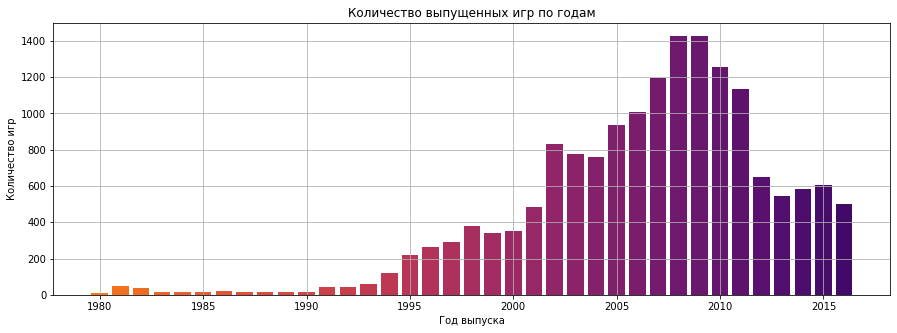

In [20]:
# строим графики
plt.figure(figsize=(15, 5))
# Генерируем массив цветов из палитры 'inferno'
colors = plt.cm.inferno(np.linspace(0.7, 0.2, len(games_per_year['year'])))
plt.bar(games_per_year['year'], games_per_year['number_of_games'], color=colors)
plt.title('Количество выпущенных игр по годам')
plt.xlabel('Год выпуска')
plt.ylabel('Количество игр')
plt.grid(True)
plt.show()

**Вывод:** 

Из графика видно, что начиная примерно с середины 90-х годов количество выпущенных игр начало расти и достигло пика в период между **2005** и **2010** годами. После **2010** года количество выпущенных игр начало уменьшаться.

**Важны ли данные за все периоды?**

Знать количество выпущенных игр полезно, чтобы понять общие тенденции и определить жизненный цикл успешных платформ.

Цель исследования - выявить определяющие успешность игры закономерности, сделать ставку на потенциально популярный продукт и спланировать рекламные кампании. Для этого будет достаточно рассмотреть только последние годы, поскольку тенденции, а также общая мода на игры могут меняться.

#### Посмотрим, как менялись продажи по платформам. 

Выбираем платформы с наибольшими суммарными продажами и построим распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

In [21]:
platform_sales = df.groupby('platform')['all_sales'].sum().sort_values(ascending=False)
platform_sales.head().to_frame()

,all_sales
platform,
PS2,1233.56
X360,959.99
PS3,931.33
Wii,891.18
DS,802.78


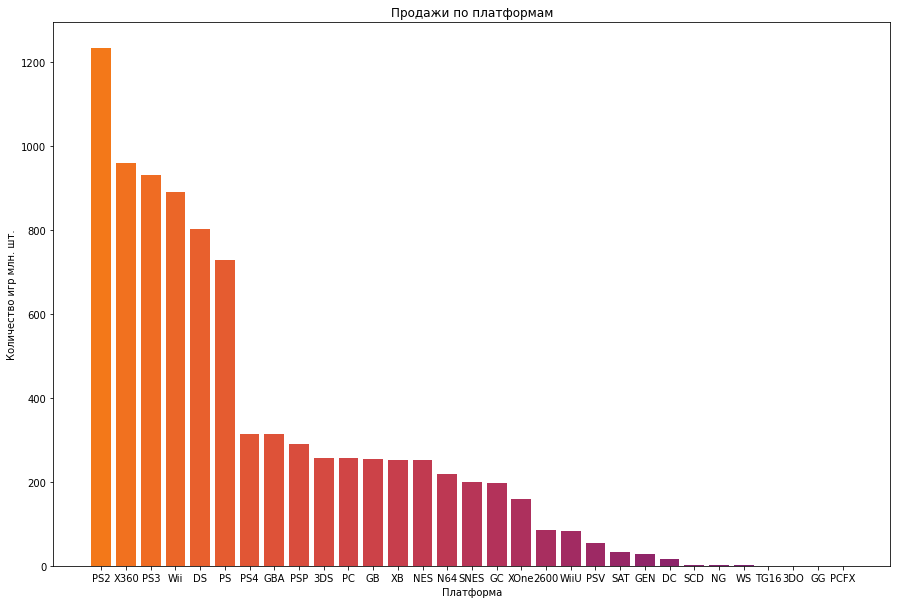

In [22]:
# строим график распределения продаж по платформам
plt.figure(figsize=(15,10))
plt.bar(platform_sales.index, platform_sales.values, color=colors)
plt.title('Продажи по платформам')
plt.xlabel('Платформа');
plt.ylabel('Количество игр млн. шт.');

In [23]:
top_platform_sales = platform_sales.head(5)

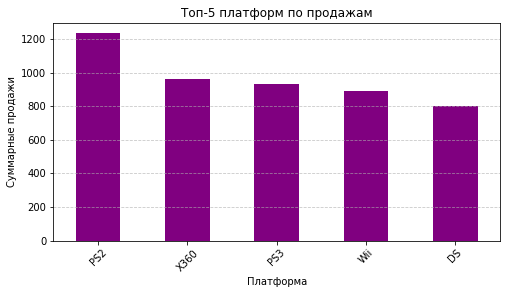

In [24]:
# Создание столбчатого графика
plt.figure(figsize=(8, 4))
top_platform_sales.plot(kind='bar', color='purple')
plt.title('Топ-5 платформ по продажам')
plt.xlabel('Платформа')
plt.ylabel('Суммарные продажи')
plt.xticks(rotation=45)  # Поворот названий платформ на оси X для лучшей читаемости
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

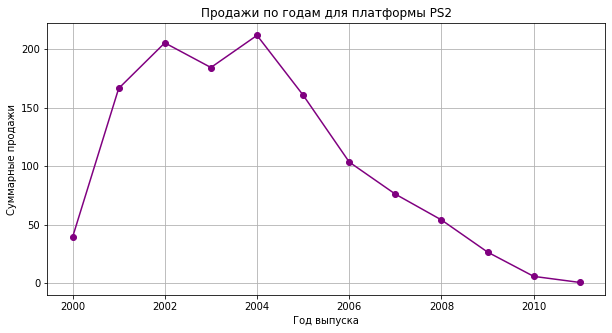

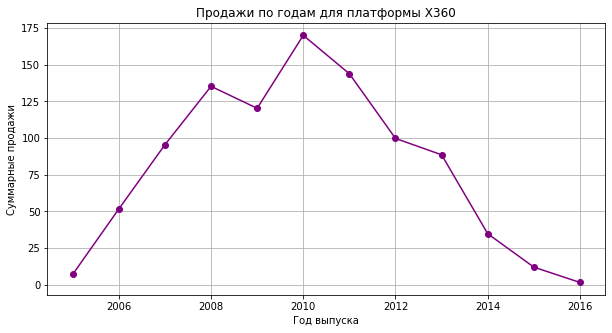

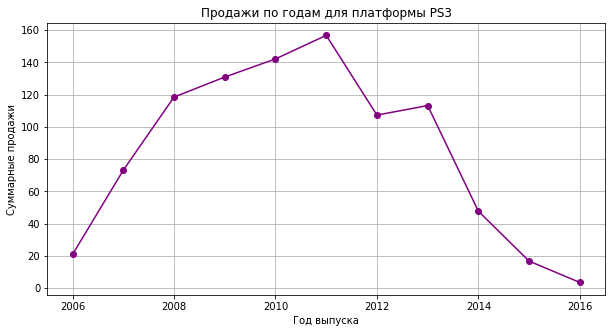

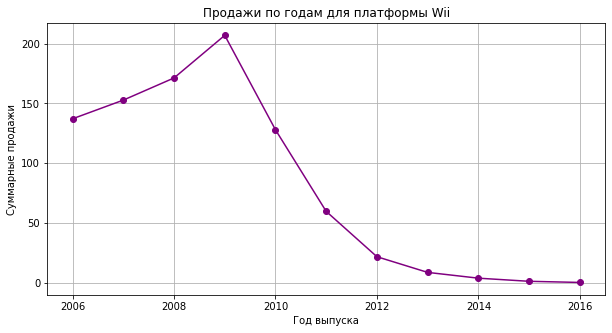

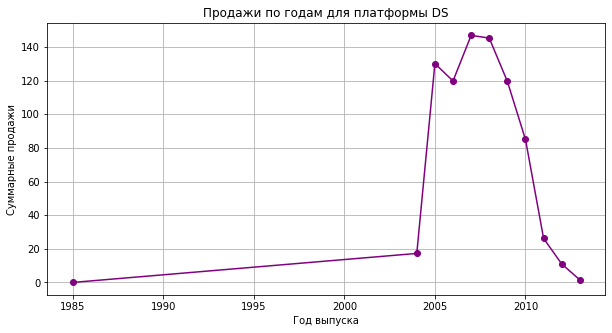

In [25]:
# Создание графиков для каждой из платформ
for platform in top_platform_sales.index:
    subset = df[df['platform'] == platform]
    yearly_sales = subset.groupby('year_of_release')['all_sales'].sum()
    plt.figure(figsize=(10, 5))
    plt.plot(yearly_sales.index, yearly_sales, marker='o', linestyle='-', color='purple')
    plt.title(f'Продажи по годам для платформы {platform}')
    plt.xlabel('Год выпуска')
    plt.ylabel('Суммарные продажи')
    plt.grid(True)
    plt.show()

За какой характерный срок появляются новые и исчезают старые платформы?

**Вывод:**

- 3 из 5 наиболее успешных платформ появились около **2006** года, пик продаж — примерно **2010** год. К 2016 году уровень продаж снизился до начального значения.
- Ещё 2 платформы, которые начали раньше, достигли пика в **2007** году. То есть, чем раньше начался рост, тем раньше продажи достигают пика и затем идёт спад.
- **PS2** – открыта в **2000** году, сразу начался рост продаж, пик в период **2002–2004**, затем плавный спад с **2004 по 2011**.
- **DS** – открыта в **1985** году, резкий рост с **2004**, пик **2007–2008**, спад с **2008 до 2011**.
- **Жизненный цикл** таких платформ составляет около **10 лет**: рост 3–5 лет, пик, спад 5–7 лет. Исключение — DS, которая была открыта в 1985 году, имела небольшой рост почти 20 лет, затем резкий скачок продаж, после чего жизненный цикл схожий с другими.
- Пики продаж у этих платформ приходятся на период **2005–2010** (наибольшее количество продаж видеоигр вообще).
- Многие крупные игровые платформы, такие как **PlayStation**, **Xbox** и **Nintendo**, имеют жизненный цикл около **10 лет** с пиковым периодом продаж в течение первых 3–5 лет после запуска.


#### Возьмем данные за соответствующий актуальный период. 
Чтобы построить прогноз на 2017 год, лучше использовать данные с 2012 года, так как до 2011 был пик продаж видеоигр, сейчас их меньше.

In [26]:
# отфильтровываем
df_actual = df[df['year_of_release'] > 2011]

#### Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.

In [27]:
platform_sales_actual = df_actual.groupby('platform')['all_sales'].sum().sort_values(ascending=False)
platform_sales_actual.head().to_frame()

,all_sales
platform,
PS4,314.14
PS3,288.78
X360,236.54
3DS,194.61
XOne,159.32


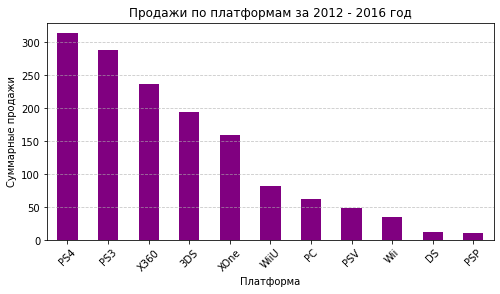

In [28]:
# Создание столбчатого графика
plt.figure(figsize=(8, 4))
platform_sales_actual.plot(kind='bar', color='purple')
plt.title('Продажи по платформам за 2012 - 2016 год')
plt.xlabel('Платформа')
plt.ylabel('Суммарные продажи')
plt.xticks(rotation=45)  # Поворот названий платформ на оси X для лучшей читаемости
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Лидеры по продажам (в порядке убывания) - PS4, PS3, X360, 3DS, XOne.

In [29]:
pivot_df_actual = df_actual.pivot_table(
    index='year_of_release', columns='platform', 
    values='all_sales', aggfunc='sum'
)
pivot_df_actual

platform,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,,
2012,51.36,11.01,23.14,107.35,NaN,7.69,16.19,21.71,17.56,99.74,NaN
2013,56.57,1.54,12.38,113.25,25.99,3.14,10.59,8.59,21.65,88.58,18.96
2014,43.76,NaN,13.28,47.76,100.00,0.24,11.90,3.75,22.03,34.74,54.07
2015,27.78,NaN,8.52,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14
2016,15.14,NaN,5.25,3.60,69.25,NaN,4.25,0.18,4.60,1.52,26.15


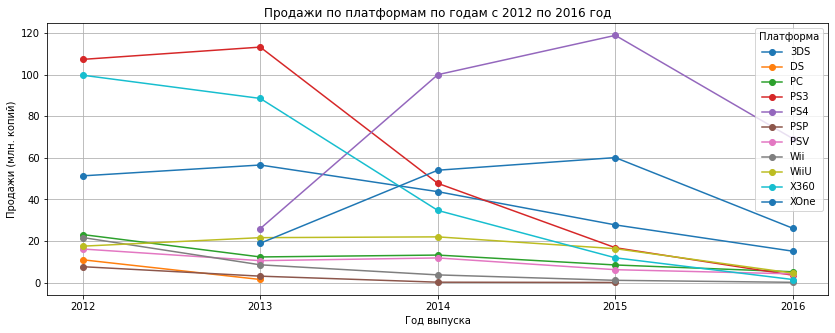

In [30]:
# Визуализация продаж по всем платформам
pivot_df_actual.plot(figsize=(14, 5), marker='o', title='Продажи по платформам по годам с 2012 по 2016 год')
plt.xlabel('Год выпуска')
plt.ylabel('Продажи (млн. копий)')
# Задаем метки на оси X
plt.xticks(ticks=[2012, 2013, 2014, 2015, 2016])
plt.grid(True)
plt.legend(title='Платформа')
plt.show()

**Вывод:**

- **PS4**: Эта платформа показывает наиболее высокие продажи, пик был в **2015 году**. Данные по 2016 году показывают спад, но, возможно, в реальности ситуация отличается (спад менее резкий, стагнация или даже рост продаж), поскольку данные по продажам 2016 года могут быть неполными. В любом случае, потенциально это наиболее прибыльная платформа.

- **XOne (Xbox One)**: Также демонстрирует хорошие продажи, хоть и уступает **PS4**. Пик продаж также приходится на **2015 год**.

- **3DS**: Явно находится на спаде, пик был в **2013 году**. Однако, учитывая, что после пика спад происходит в течение 5 лет, в 2017 году эта платформа ещё может принести какие-то продажи.

- Остальные платформы показывают низкое количество продаж и находятся на исходе жизненного цикла.

В целом, постепенное снижение продаж может быть связано с уменьшением интереса к портативным игровым системам в пользу смартфонов и других мобильных устройств.


#### Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам.

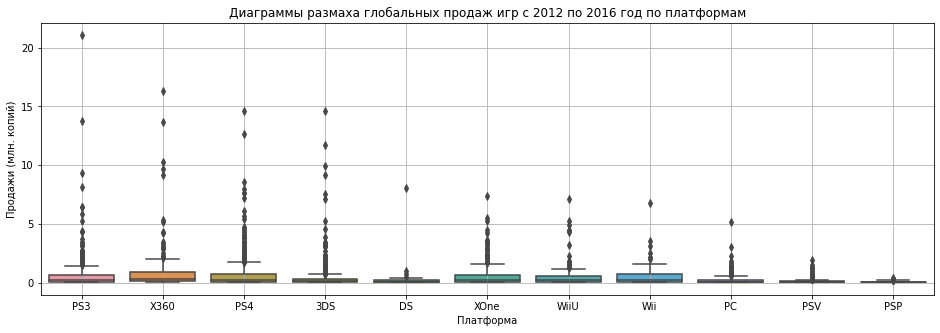

In [31]:
plt.figure(figsize=(16, 5))
sns.boxplot(x='platform', y='all_sales', data=df_actual)
plt.title('Диаграммы размаха глобальных продаж игр с 2012 по 2016 год по платформам')
plt.xlabel('Платформа')
plt.ylabel('Продажи (млн. копий)')
plt.xticks(rotation=0)  # Поворот меток на оси X для лучшей читаемости
plt.grid(True)
#plt.ylim(0, 3)  # Ограничивам выбросы
plt.show()

На платформах PS3, X360, PS4, и 3DS присутствуют значительные выбросы, которые указывают на наличие очень успешных игр, продажи которых значительно выше обычного уровня.

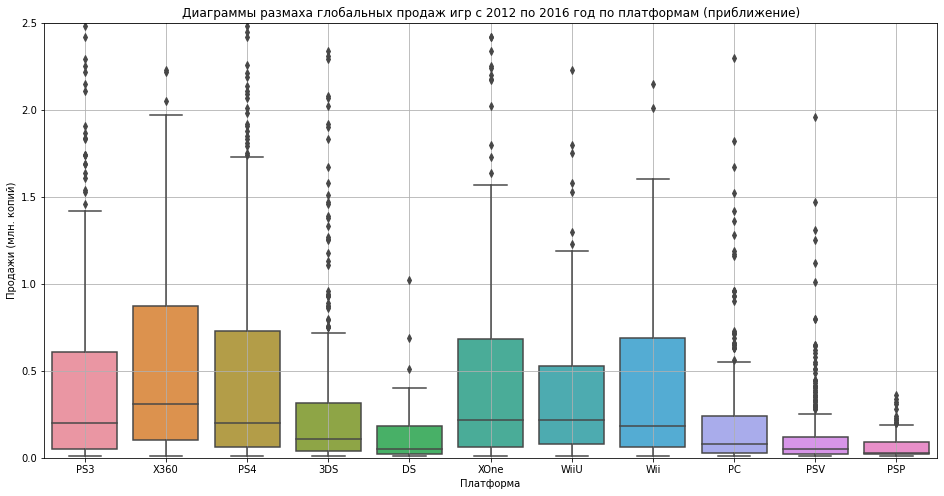

In [32]:
plt.figure(figsize=(16, 8))
sns.boxplot(x='platform', y='all_sales', data=df_actual)
plt.title('Диаграммы размаха глобальных продаж игр с 2012 по 2016 год по платформам (приближение)')
plt.xlabel('Платформа')
plt.ylabel('Продажи (млн. копий)')
plt.xticks(rotation=0)  # Поворот меток на оси X для лучшей читаемости
plt.grid(True)
plt.ylim(0, 2.5)  # Ограничивам выбросы
plt.show()

**Вывод:**

- Медиана продаж на большинстве платформ находится достаточно низко, что указывает на то, что типичные продажи на этих платформах составляют относительно небольшие суммы.
- Расстояние между первым и третьим квартилями у большинства платформ не очень велико, что свидетельствует о более однородных продажах игр на этих платформах.
- **PS4, PS3, X360, 3DS, XOne** — лидеры по продажам, однако медиана, межквартильный размах и верхние усы не сильно отличаются от большинства других платформ.  
  Лидерами эти платформы становятся за счёт выбросов — хитовых игр, продажи которых значительно выше обычного уровня.


#### Как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. 
Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами.

In [33]:
# отфильтруем данные для платформы PS3
df_PS3 = df_actual.query('platform == "PS3"')

In [34]:
print('Корреляция между оценкой пользователей и продажами:',
      df_PS3['user_score'].corr(df_PS3['all_sales']))

Корреляция между оценкой пользователей и продажами: -0.006205767686051523


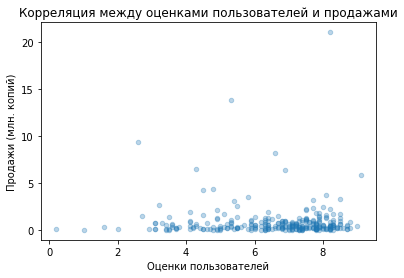

In [35]:
df_PS3.plot(x='user_score', y='all_sales', kind='scatter', colormap='inferno', alpha=0.3)
plt.title('Корреляция между оценками пользователей и продажами')
plt.xlabel('Оценки пользователей')
plt.ylabel('Продажи (млн. копий)');

Очень низкое значение корреляции (-0.005) указывает на то, что оценки пользователей имеют незначительное влияние на объемы продаж игр на данной платформе.

Высокие продажи могут быть как у игр с высокими оценками, так и у игр с низкими оценками.

In [36]:
print('Корреляция между оценкой критиков и продажами:',
      df_PS3['critic_score'].corr(df_PS3['all_sales']))

Корреляция между оценкой критиков и продажами: 0.3341517575509856


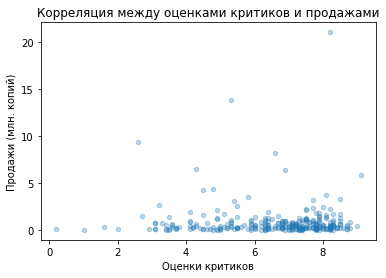

In [37]:
df_PS3.plot(x='user_score', y='all_sales', kind='scatter', colormap='inferno', alpha=0.3)
plt.title('Корреляция между оценками критиков и продажами')
plt.xlabel('Оценки критиков')
plt.ylabel('Продажи (млн. копий)');

**Вывод:**

- Значение корреляции **0.331** говорит о том, что высокие оценки критиков могут быть связаны с более высокими продажами. Однако эта связь является слабой, и многие игры продаются хорошо даже при средних оценках критиков.
- График показывает, что большинство игр имеют оценки критиков в диапазоне от **50 до 80** и относительно низкие продажи (менее **5 миллионов** копий). Однако некоторые игры с оценками выше **80** имеют значительно более высокие продажи (более **10 миллионов** копий), что подтверждает положительную зависимость.
- **Оценки пользователей** не влияют на объемы продаж игр на данной платформе.


#### Соотнесем выводы с продажами игр на других платформах.

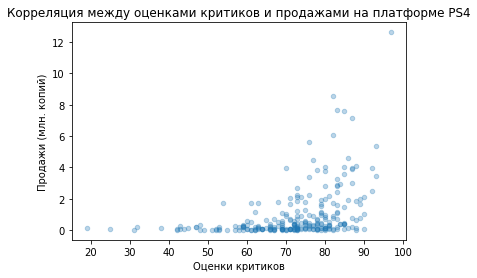

Корреляция между оценкой критиков и продажами на платформе PS4: 0.40656790206178095


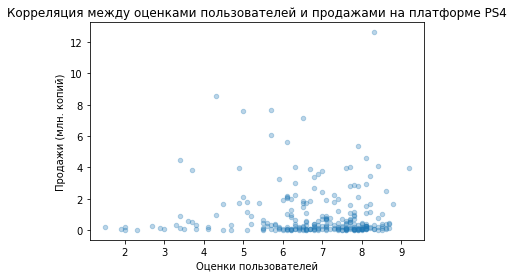

Корреляция между оценкой пользователей и продажами на платформе PS4: -0.031957110204556376


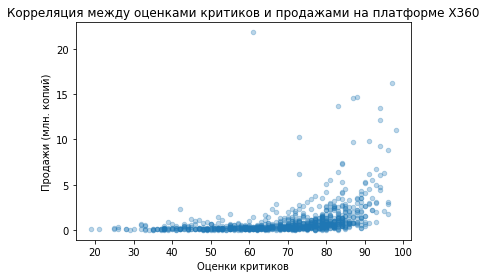

Корреляция между оценкой критиков и продажами на платформе X360: 0.392902173808289


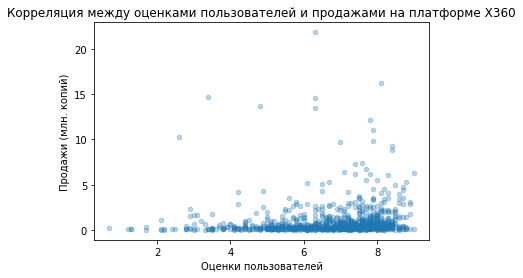

Корреляция между оценкой пользователей и продажами на платформе X360: 0.11405439431804776


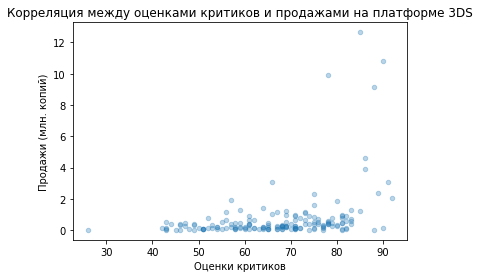

Корреляция между оценкой критиков и продажами на платформе 3DS: 0.3487397305984834


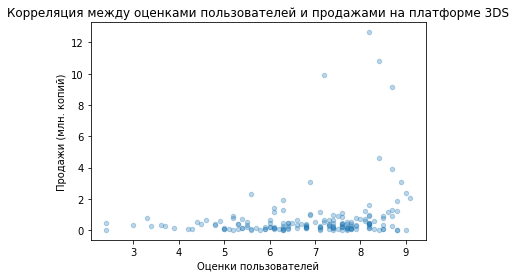

Корреляция между оценкой пользователей и продажами на платформе 3DS: 0.22207843643390882


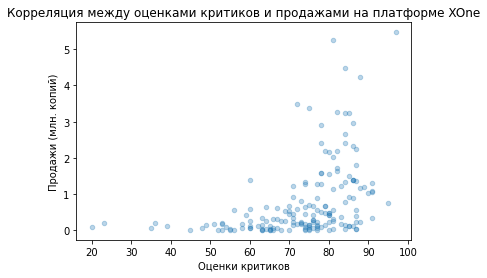

Корреляция между оценкой критиков и продажами на платформе XOne: 0.4169983280084017


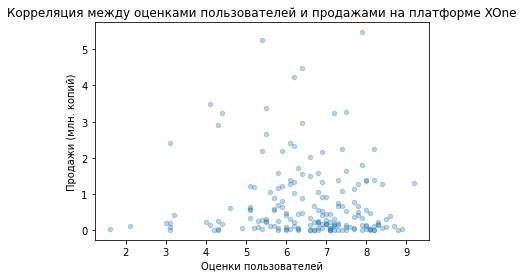

Корреляция между оценкой пользователей и продажами на платформе XOne: -0.06892505328279414


In [38]:
for n in ['PS4', 'X360', '3DS', 'XOne']:
    df_select = df.query('platform == @n')
    df_select.plot(x='critic_score', y='all_sales', kind='scatter', alpha=0.3)
    plt.title(f'Корреляция между оценками критиков и продажами на платформе {n}')
    plt.xlabel('Оценки критиков')
    plt.ylabel('Продажи (млн. копий)')
    plt.show()
    print(f'Корреляция между оценкой критиков и продажами на платформе {n}:', 
          df_select['critic_score'].corr(df_select['all_sales']))

    df_select.plot(x='user_score', y='all_sales', kind='scatter', alpha=0.3)
    plt.title(f'Корреляция между оценками пользователей и продажами на платформе {n}')
    plt.xlabel('Оценки пользователей')
    plt.ylabel('Продажи (млн. копий)')
    plt.show()
    print(f'Корреляция между оценкой пользователей и продажами на платформе {n}:', 
          df_select['user_score'].corr(df_select['all_sales']))

**Вывод:** 

- На других популярных платформах ситуация похожа: Корреляция между оценкой пользователей и продажами как правило отсутствует, а между оценкой критиков и продажами - слабая.

#### Распределение игр по жанрам

Посмотрим на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

In [39]:
# смотрим общие продажи по жанрам
genre_sales = df_actual.groupby('genre')['all_sales'].sum().sort_values(ascending=False)
genre_sales.head(12).to_frame()

,all_sales
genre,
Action,441.12
Shooter,304.73
Role-Playing,192.80
Sports,181.06
Misc,85.04
Platform,61.00
Racing,53.42
Fighting,44.49
Simulation,35.12


Лидерами по общим продажам являются **Action** (441.12 млн копий) и **Shooter** (304.73 млн копий).

**Role-Playing** (192.80 млн копий) и **Sports** (181.06 млн копий) также показывают высокие результаты.

Однако, общие продажи - плохая метрика для поиска наиболее прибыльного жанра. Возможно, количество игр разных жанров сильно отличается.

In [40]:
# проверяем количество игр каждого жанра
df_actual.groupby('genre').size().sort_values(ascending=False)

genre
Action          1031
Role-Playing     370
Adventure        302
Sports           267
Shooter          235
Misc             192
Racing           114
Fighting         109
Platform          85
Simulation        80
Strategy          71
Puzzle            28
dtype: int64

Количество игр жанра **Action** значительно превышает остальные (1031). А вот **Shooter**-ов в несколько раз меньше, а по количеству продаж он на 2ом месте. 

Чтобы точнее определить наиболее прибыльные жанры, рассмотрим медианные продажи.

In [41]:
# теперь рассмотрим медианные продажи
median_sales_by_genre = df_actual.groupby('genre')['all_sales'].median().sort_values(ascending=False)
median_sales_by_genre.head(12).to_frame()

,all_sales
genre,
Shooter,0.440
Sports,0.240
Platform,0.210
Racing,0.150
Role-Playing,0.140
Fighting,0.130
Action,0.120
Misc,0.120
Simulation,0.120


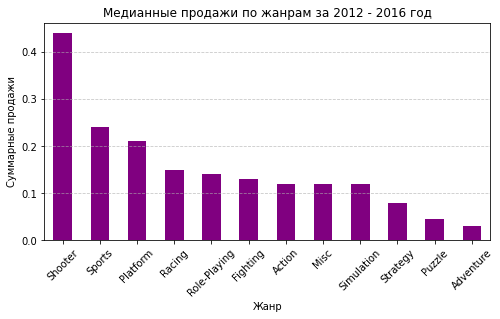

In [42]:
# Создание столбчатого графика
plt.figure(figsize=(8, 4))
median_sales_by_genre.plot(kind='bar', color='purple')
plt.title('Медианные продажи по жанрам за 2012 - 2016 год')
plt.xlabel('Жанр')
plt.ylabel('Суммарные продажи')
plt.xticks(rotation=45)  # Поворот названий платформ на оси X для лучшей читаемости
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**Вывод:**

- **Самые прибыльные жанры:**  
  - **Shooter** (медианные продажи — 0.44 млн копий)  
  - **Sports** (медианные продажи — 0.24 млн копий)  
  - **Platform** (медианные продажи — около 0.21 млн копий)

- **Жанры с умеренными продажами:**  
  - **Racing**, **Role-Playing**, **Fighting** и **Action**.  
  - Наиболее высокое количество игр:  
    - **Action** — 1031 игра  
    - **Role-Playing** — 370 игр

- **Жанры с низкими продажами:**  
  - **Misc**, **Simulation**, **Strategy**, **Puzzle** и **Adventure**.


### Составим портрет пользователя каждого региона

Определим для пользователя каждого региона (NA, EU, JP):
Самые популярные платформы (топ-5). 

Берем данные за актуальный период (с 2012 года).

#### Самые популярные платформы

[Дополнительная информация](https://en.wikipedia.org/wiki/List_of_best-selling_game_consoles).

In [81]:
def get_top_platforms_with_others(df, region_sales_col, top_n=5):
    # Группируем по платформам и суммируем продажи
    platforms_grouped = df.groupby('platform')[region_sales_col].sum().sort_values(ascending=False)
    # Получаем top_n самых популярных платформ
    top_platforms = platforms_grouped.head(top_n).reset_index()
    # Суммируем продажи остальных платформ
    others_sales = platforms_grouped.iloc[top_n:].sum()
    # Добавляем категорию "Другие"
    others_row = pd.DataFrame([['Другие', others_sales]], columns=['platform', region_sales_col])
    # Объединяем топ_n платформ и категорию "Другие"
    final = pd.concat([top_platforms, others_row], ignore_index=True)
    return final

# Применяем функцию для каждого региона
final_na = get_top_platforms_with_others(df_actual, 'na_sales')
final_eu = get_top_platforms_with_others(df_actual, 'eu_sales')
final_jp = get_top_platforms_with_others(df_actual, 'jp_sales')

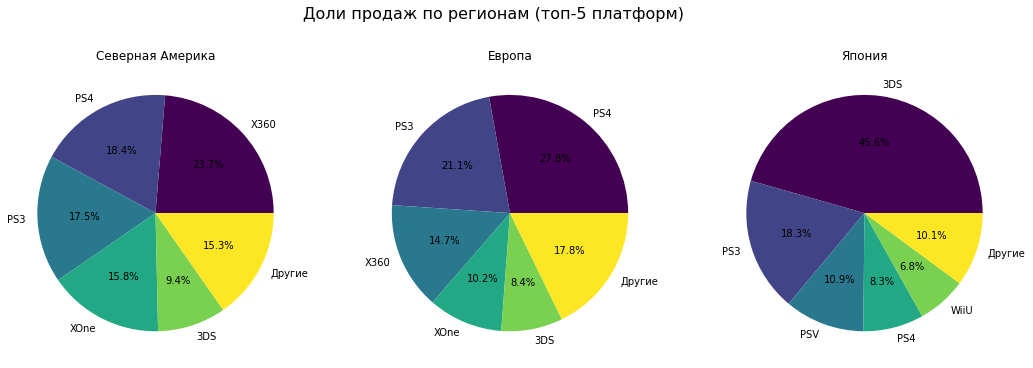

In [83]:
# Создаем фигуру и оси для трех графиков
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Строим диаграммы
final_na.plot(kind='pie', y='na_sales', labels=final_na['platform'], autopct='%1.1f%%', 
              ax=axes[0], legend=False, cmap='viridis')
axes[0].set_ylabel("")
axes[0].set_title('Северная Америка')

final_eu.plot(kind='pie', y='eu_sales', labels=final_eu['platform'], autopct='%1.1f%%', 
              ax=axes[1], legend=False, cmap='viridis')
axes[1].set_ylabel("")
axes[1].set_title('Европа')

final_jp.plot(kind='pie', y='jp_sales', labels=final_jp['platform'], autopct='%1.1f%%', 
              ax=axes[2], legend=False, cmap='viridis')
axes[2].set_ylabel("")
axes[2].set_title('Япония')

# Устанавливаем общий заголовок для всех графиков
plt.suptitle('Доли продаж по регионам (топ-5 платформ)', fontsize=16)
plt.show()

**Северная Америка (NA):** В этом регионе самой популярной платформой является X360 (23.7%), с отрывом от PS4 (18.4%). Платформа PS3 также занимает значительную долю рынка (17.5%). Завершают топ XOne (15.8%) и 3DS (9.4%). Другие платформы занимают 15.3% доли рынка.

**Европа (EU):** PS4 занимает лидирующие позиции - 27.8%, PS3 - 21.1%. X360 (14.7%), XOne (10.2%) 3DS - 8.4%. Другие платформы занимают 17.8% доли рынка.

**Япония (JP):** 3DS лидирует с долей продаж в 45.6% , за ней следуют PS3 (18.3%) и PSV (10.9%). Также занимают значительные доли рынка PS4 (8.3%) и WiiU (6.8%). Другие платформы - 10.1% доли рынка.

#### Самые популярные жанры (топ-5). 

In [45]:
# Смотрим самые популярные жанры для Северной Америки
top_genres_na = df_actual.groupby('genre')['na_sales'].sum().sort_values(ascending=False).head(5)
top_genres_na.to_frame()

,na_sales
genre,
Action,177.84
Shooter,144.77
Sports,81.53
Role-Playing,64.00
Misc,38.19


In [46]:
# Смотрим самые популярные жанры для Европы
top_genres_eu = df_actual.groupby('genre')['eu_sales'].sum().sort_values(ascending=False).head(5)
top_genres_eu.to_frame()

,eu_sales
genre,
Action,159.34
Shooter,113.47
Sports,69.08
Role-Playing,48.53
Racing,27.23


In [47]:
# Смотрим самые популярные платформы для Японии
top_genres_jp = df_actual.groupby('genre')['jp_sales'].sum().sort_values(ascending=False).head(5)
top_genres_jp.to_frame()

,jp_sales
genre,
Role-Playing,65.44
Action,52.80
Misc,12.86
Simulation,10.41
Fighting,9.44


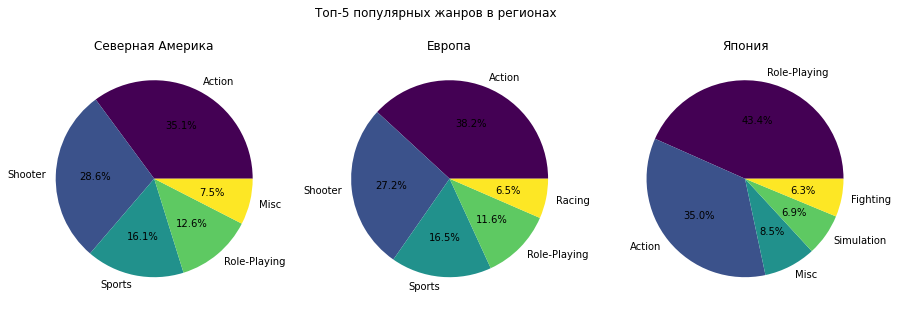

In [48]:
# Создаем фигуру и оси для трех графиков
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Строим диаграммы
top_genres_na.plot(kind='pie', ax=axes[0], autopct='%1.1f%%', colormap='viridis', legend=False)
axes[0].set_ylabel("")
axes[0].set_title('Северная Америка')

top_genres_eu.plot(kind='pie', ax=axes[1], autopct='%1.1f%%', colormap='viridis', legend=False)
axes[1].set_ylabel("")
axes[1].set_title('Европа')

top_genres_jp.plot(kind='pie', ax=axes[2], autopct='%1.1f%%', colormap='viridis', legend=False)
axes[2].set_ylabel("")
axes[2].set_title('Япония')

# Устанавливаем общий заголовок для всех графиков
plt.suptitle('Топ-5 популярных жанров в регионах')
plt.show()

**Северная Америка (NA):**  
- **Action** доминирует (35.1% долей рынка), что указывает на предпочтение динамичных и захватывающих игр.  
- **Shooter** занимает второе место (28.6%), подтверждая популярность игр, в которых основной фокус делается на стрельбу.  
- **Sports** — третье место (16.1%).  
- Умеренную популярность имеют жанры **Role-Playing (RPG)** (12.6% долей рынка) и **Misc** (7.5%).

**Европа (EU):**  
- Популярные жанры почти не отличаются от Северной Америки:  
  - **Action** — 38.1%  
  - **Shooter** — 27.2%  
  - **Sports** — 16.5%  
  - **Role-Playing** — 11.6%  
- Отличительной особенностью является то, что пятое место занимает жанр **Racing** (6.5%), что говорит о его большей популярности в Европе.

**Япония (JP):**  
- Японские игроки имеют уникальные предпочтения, что отражает культурные особенности (акцент на историю и сюжет).  
- Доминируют **Role-Playing** игры (43.3% долей рынка).  
- **Action** игры также популярны (35.0%).  
- Кроме того, заметен интерес к жанрам **Misc** (8.5%), **Simulation** (6.9%) и **Fighting** (6.3%).


**Вывод:**

- Во всех рассмотренных регионах популярен жанр **Action**.
- В **Европе** и **Северной Америке** наиболее популярные жанры почти идентичны.
- Предпочтения пользователей в **Японии** отличаются – преобладает жанр **Role-Playing**.


#### Влияние рейтинга ESRB на продажи в отдельном регионе

In [49]:
pivot_esrb = df_actual.pivot_table(values=['na_sales', 'eu_sales', 'jp_sales'], 
                             index='rating', 
                             aggfunc='sum')
pivot_esrb

,eu_sales,jp_sales,na_sales
rating,,,
E,113.02,28.33,114.37
E10+,55.37,8.19,75.70
M,193.96,21.20,231.57
T,52.90,26.02,66.02
undefined,91.50,108.84,103.31


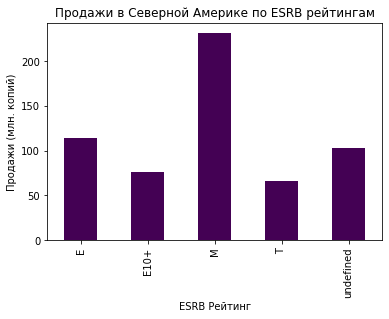

In [50]:
# Продажи в Северной Америке
pivot_esrb['na_sales'].plot(kind='bar', cmap='viridis', title='Продажи в Северной Америке по ESRB рейтингам')
plt.xlabel('ESRB Рейтинг')
plt.ylabel('Продажи (млн. копий)')
plt.show()

**Северная Америка (NA):**

- **Рейтинг M (Mature)** доминирует в продажах — **231.57 млн** копий, что значительно больше, чем у других рейтингов. Это указывает на высокую популярность игр для взрослых в этом регионе.
- **Рейтинг E (Everyone)** также имеет высокие продажи — **114.37 млн** копий.
- Продажи игр с рейтингами **E10+ (Everyone 10 and older)** и **T (Teen)** ниже всего.


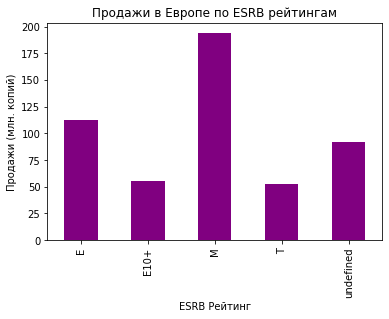

In [51]:
# Продажи в Европе
pivot_esrb['eu_sales'].plot(kind='bar', color='purple', title='Продажи в Европе по ESRB рейтингам')
plt.xlabel('ESRB Рейтинг')
plt.ylabel('Продажи (млн. копий)')
plt.show()

**Европа (EU):**

- **Рейтинг M (Mature)** лидирует с **193.96 млн** копий.
- **Рейтинг E (Everyone)** занимает второе место (**113.03 млн** копий).
- Продажи игр с рейтингом **E10+ (Everyone 10 and older)** и **T (Teen)** значительно ниже.


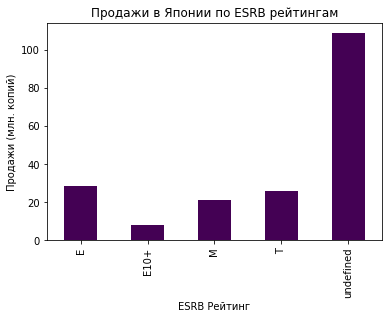

In [52]:
# Продажи в Японии
pivot_esrb['jp_sales'].plot(kind='bar', cmap='viridis', title='Продажи в Японии по ESRB рейтингам')
plt.xlabel('ESRB Рейтинг')
plt.ylabel('Продажи (млн. копий)')
plt.show()

**Япония (JP):**

- Наибольшие продажи у **рейтинг E (Everyone)** — **28.33 млн** копий, что указывает на предпочтение игр для всех возрастов.
- **Рейтинг T (Teen)** также имеет значительные продажи (**26.02 млн** копий) — игры для подростков занимают второе место по популярности.
- **Рейтинг M (Mature)** имеет немного более низкие продажи (**21.2 млн** копий).
- Самые низкие продажи у **рейтинг E10+ (Everyone 10 and older)**, что указывает на меньшую популярность игр для взрослых и детей старше 10 лет.


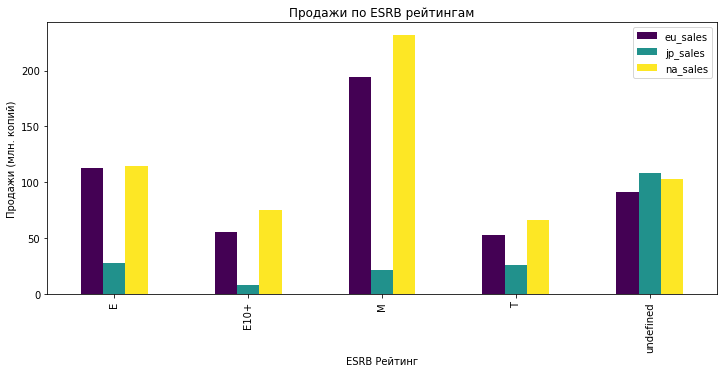

In [53]:
pivot_esrb.plot(kind='bar', figsize=(12, 5), colormap='viridis', title='Продажи по ESRB рейтингам')
plt.xlabel('ESRB Рейтинг')
plt.ylabel('Продажи (млн. копий)')
plt.show()


- **Рейтинг M (Mature)** доминирует в продажах в Северной Америке и Европе, что указывает на высокую популярность игр для взрослых.
- **Рейтинг E (Everyone)** занимает второе место в Северной Америке и Европе, а также первое место в Японии, подчеркивая важность игр для всех возрастов во всех регионах.
- В Японии наибольшие продажи приходятся на рейтинги **E** и **T (Teen)**, что отражает культурные предпочтения к играм для всех возрастов и подростков.
- Продажи игр с рейтингом **E10+ (Everyone 10 and older)** относительно низки везде, что может указывать на узкую целевую аудиторию для этого рейтинга.


**Выводы:**

- **Американские пользователи** предпочитают динамичные и захватывающие игры, особенно жанры **Action** и **Shooter**.  
  - Спортивные игры также популярны.  
  - Игры для взрослых (рейтинг **M**) доминируют в продажах, указывая на высокий спрос на контент для зрелых игроков.  
  - Игры для всех возрастов (рейтинг **E**) также занимают значительную долю рынка.  
  - Популярные платформы: **X360** (23.7%), **PS4** (18.4%), **PS3** (17.5%), **XOne** (15.8%) и **3DS** (9.4%). Другие платформы занимают 15.3% доли рынка.

- **Портрет пользователя из Европы** близок к американскому:  
  - Наиболее популярные жанры – **Action** и **Shooter**.  
  - Спортивные и ролевые игры также пользуются значительным спросом.  
  - Игры для взрослых (рейтинг **M**) и игры для всех возрастов (рейтинг **E**) занимают значительную долю рынка.  
  - Особенностью европейского рынка является популярность гоночных игр (**Racing**).  
  - Наиболее популярные консоли: **PS4** (27.8%), **PS3** (21.1%), **X360** (14.7%), **XOne** (10.2%) и **3DS** (8.4%). Другие платформы занимают 17.8% доли рынка.

- **Японские игроки** имеют уникальные предпочтения, отражающие культурные особенности:  
  - Доминирование жанра **Role-Playing (RPG)** указывает на любовь к играм с глубокими сюжетами и детализированными мирами.  
  - **Action** игры также занимают значительную часть рынка.  
  - Игры для всех возрастов (рейтинг **E**) лидируют по продажам, что отражает семейные ценности и доступность игр.  
  - Игры для подростков (рейтинг **T**) также популярны, в то время как игры для взрослых (рейтинг **M**) имеют более низкие продажи.  
  - Популярные платформы: **3DS** (45.6%), **PS3** (18.3%), **PSV** (10.9%), **PS4** (8.3%) и **WiiU** (6.8%). Другие платформы – 10.1% доли рынка.


### Проверка гипотез

#### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

Нулевая гипотеза - средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

Альтернативная гипотеза - средние пользовательские рейтинги платформ Xbox One и PC разные.


В данном случае может быть использован t-тест для независимых выборок (Independent Samples t-test). Этот критерий применяется потому, что:

* Мы сравниваем средние значения двух групп.
* Выборки независимы друг от друга (рейтинг одной платформы не зависит от рейтинга другой платформы).

Критический уровень статистической значимости принимаю равным 5% (стандартный уровень, который используется в большинстве статистических тестов).

In [54]:
alpha = 0.05 # уровень статистической значимости

# Фильтрация данных для платформы 'XOne' и удаление строк с отсутствующими значениями user_score
xone = df_actual[(df_actual['platform'] == 'XOne') & (df_actual['user_score'].notna())]['user_score']
pc = df_actual[(df_actual['platform'] == 'PC') & (df_actual['user_score'].notna())]['user_score']
                                                      

results = st.ttest_ind(xone, pc)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 0.5112133814834332
Не получилось отвергнуть нулевую гипотезу


**Вывод:** Нельзя утверждать, что средние пользовательские рейтинги платформ Xbox One и PC разные.

#### Средние пользовательские рейтинги жанров Action и Sports разные.

- **Нулевая гипотеза** - средние пользовательские рейтинги жанров Action и Sports одинаковые;

- **Альтернативная гипотеза** - средние пользовательские рейтинги жанров Action и Sports разные.


В данном случае также может быть использован t-тест для независимых выборок (Independent Samples t-test).

Критический уровень статистической значимости - 5%.

In [55]:
alpha = 0.05 # уровень статистической значимости

# Фильтрация данных для платформы 'XOne' и удаление строк с отсутствующими значениями user_score
xone = df_actual[(df_actual['genre'] == 'Action') & (df_actual['user_score'].notna())]['user_score']
pc = df_actual[(df_actual['genre'] == 'Sports') & (df_actual['user_score'].notna())]['user_score']
                                                      

results = st.ttest_ind(xone, pc)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 4.8045233804629176e-26
Отвергаем нулевую гипотезу


**Вывод:** Есть основания утверждать, что средние пользовательские рейтинги жанров Action и Sports разные

### Общий вывод

#### Предобработка данных с описанием найденных проблем и путей их решения

- **Названия столбцов** были приведены к нижнему регистру;

- **Типы данных** преобразовали в нужные: *year_of_release* (год выпуска) - в int, *user_score* (оценка пользователя) - во float.

- **Пропуски** - удалили строки с пропусками в *name, year_of_release и genre*, поскольку их незначительное количество.
Пропуски в столбцах *rating, critic_score и user_score* оставили как есть, поскольку замена может сильно исказить результаты.

- **Дубликаты:** Была сделана проверка на наличие явных дубликатов, явные дубликаты строк отсутствуют. Неявных дубликатов было наййдено 5, они были удалены


- **Добавлены новые столбцы**: посчитали суммарные продажи во всех регионах и запишисали их в отдельный столбец

---

#### Выводы по исследовательскому анализу данных

**Сколько игр выпускалось в разные годы:**  
- Начиная примерно с середины 90-х годов, количество выпущенных игр начало расти и достигло пика в период между 2005 и 2010 годами. После 2010 года количество выпущенных игр начало уменьшаться.

**Жизненный цикл платформ с наибольшим количеством продаж:**  
- Рост – 3–5 лет, пик продаж, спад – 5–7 лет.  
- Знание типичного жизненного цикла платформы помогает планировать маркетинговые кампании и разработку игр для максимального использования периода популярности платформы.

> Чтобы построить прогноз на 2017 год, данные были отфильтрованы до 2012 года, поскольку тогда был пик продаж видеоигр. В целом, постепенное снижение продаж может быть связано с уменьшением интереса к портативным игровым системам в пользу смартфонов и других мобильных устройств.

**Платформы с наибольшим количеством продаж** (в порядке убывания):  
- **PS4**, **PS3**, **X360**, **3DS**, **XOne**.  
- Лидерами являются платформы, благодаря хитовым играм с высокими продажами.  
- Потенциально наиболее прибыльные – **PS4**, **XOne**; **3DS** также может принести продажи, тогда как остальные платформы показывают низкое количество продаж и находятся на исходе жизненного цикла.

**Влияние отзывов пользователей и критиков на продажи:**  
- **User_Score** не влияет на объемы продаж игр на данной платформе.  
- Корреляция между **Critic_Score** и продажами слабая положительная – многие игры продаются хорошо даже при средних оценках критиков.

**Распределение игр по жанрам:**  
- **Самые прибыльные жанры:**  
  - **Shooter** (медианные продажи – 0.44 млн копий),  
  - **Sports** (медианные продажи – 0.24 млн копий),  
  - **Platform** (медианные продажи – около 0.21 млн копий).  
- **Жанры с умеренными продажами:** Racing, Role-Playing, Fighting и Action.  
- **Жанры с низкими продажами:** Misc, Simulation, Strategy, Puzzle и Adventure.  
- Для **Action** жанра наблюдается наибольшее количество игр (1031) и суммарные продажи – 441.12 млн копий, а для **Role-Playing** – 370 игр с суммарными продажами 192.80 млн копий.

---

#### Портрет пользователя каждого региона

**Американские пользователи:**  
- Предпочитают динамичные и захватывающие игры, особенно жанры **Action** (35.1% долей рынка) и **Shooter** (28.6%).  
- **Sports** игры также популярны (16.1%).  
- Умеренную популярность имеют **Role-Playing** (12.6% долей рынка) и **Misc** (7.5%).  
- Игры для взрослых (рейтинг **M**) доминируют в продажах (231.57 млн копий), что указывает на высокий спрос на контент для зрелых игроков.  
- Игры для всех возрастов (рейтинг **E**) занимают значительную долю рынка (114.37 млн копий), а продажи игр с рейтингами **E10+** и **T** – ниже.  
- Популярные платформы: **X360** (23.7%), **PS4** (18.4%), **PS3** (17.5%), **XOne** (15.8%) и **3DS** (9.4%). Остальные платформы составляют 15.3% доли рынка.

**Пользователи из Европы:**  
- Предпочтения схожи с американскими – **Action** (38.1%) и **Shooter** (27.2%) – лидируют, за ними следуют **Sports** (16.5%) и **Role-Playing** (11.6%).  
- Особенностью является популярность гоночных игр (**Racing** – 6.5%).  
- Лидируют игры для взрослых (рейтинг **M** – 193.96 млн копий) и для всех возрастов (рейтинг **E** – 113.03 млн копий), а продажи игр с рейтингами **E10+** и **T** – ниже.  
- Популярные консоли: **PS4** (27.8%), **PS3** (21.1%), **X360** (14.7%), **XOne** (10.2%) и **3DS** (8.4%). Остальные платформы – 17.8% доли рынка.

**Японские игроки:**  
- Характеризуются уникальными предпочтениями: доминирует жанр **Role-Playing** (43.3%), что указывает на любовь к играм с глубоким сюжетом и детализированными мирами.  
- **Action** игры также занимают значительную часть (35.0%).  
- Есть заметный интерес к жанрам **Misc** (8.5%), **Simulation** (6.9%) и **Fighting** (6.3%).  
- Продажи игр для всех возрастов (рейтинг **E**) лидируют – 28.33 млн копий, для подростков (рейтинг **T**) – 26.02 млн, тогда как для взрослых (рейтинг **M**) – 21.2 млн копий; у рейтинга **E10+** – самые низкие продажи.  
- Популярные платформы: **3DS** (45.6%), **PS3** (18.3%), **PSV** (10.9%), **PS4** (8.3%) и **WiiU** (6.8%). Остальные платформы составляют 10.1% доли рынка.

---


#### Выводы по проверке гипотез

- **Одинаковые ли средние пользовательские рейтинги платформ Xbox One и PC?**
Нельзя утверждать, что они разные.

- **Разные ли средние пользовательские рейтинги жанров Action и Sports?**
Есть основания утверждать, что разные.

---


#### Рекомендации для заказчика:

**Ориентироваться на популярные платформы**  
- **Основные платформы для Северной Америки и Европы:**  
  - **PS4** и **XOne** — рекомендуются, так как находятся не в конце жизненного цикла и генерируют высокие продажи.  
  - **3DS** — перспективна для Японии, где занимает значительную долю рынка, несмотря на меньшие объемы продаж по сравнению с NA и EU.

**Продажа игр популярных жанров**  
- **Северная Америка и Европа:**  
  - Сосредоточить усилия на жанрах **Shooter** и **Sports**, которые показывают наиболее высокие медианные продажи.  
  - Жанр **Action** популярен и занимает большую долю рынка, но вложения в него требуют осторожности из-за насыщенности рынка.  
  - Рекламные кампании должны подчёркивать динамичность и захватывающие элементы игр этих жанров.
- **Япония:**  
  - Сделать акцент на **Role-Playing** играх, так как они доминируют на японском рынке.  
  - Рекламные кампании должны акцентировать внимание на сюжете и глубине игры.

**Учет региональных предпочтений и рейтингов ESRB**  
- **Северная Америка и Европа:**  
  - Продолжать расширять ассортимент игр с рейтингом **M (Mature)**, поскольку они пользуются высоким спросом.  
  - Игры с рейтингом **E (Everyone)** также остаются важными для массового рынка.
- **Япония:**  
  - Сфокусироваться на играх для всех возрастов (рейтинг **E**) и для подростков (рейтинг **T**), так как они лидируют в продажах на этом рынке.
```